### 1. (10 points)  Generate a (synthetic) dataset using the same procedure as you did for Problem 5 in Assignment 2. Given this dataset {(x1, y1), . . . , (xn, yn)}, train a logistic regression model that tries to minimize:  <img src="cost.png"> using two different methods:   
(i) Gradient descent (GD), and   
(ii) Stochastic gradient descent (SGD).   
For each method, plot the decay of the loss function as a function of number of iterations. Demonstrate that SGD exhibits a slower rate of convergence than GD, but is faster per-iteration, and does not suffer in terms of final quality. You may have to play around a bit with the step-sizes to get reasonable answers.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import argparse
import timeit
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
arr = (np.random.randn(100, 2) / 10) + 0.5
arr2 = (np.random.randn(100, 2) / 10) - 0.5

x,y = arr.T

at = np.hstack((arr, np.ones((100,1))))
at = np.hstack((at, np.ones((100,1))))

temp = np.ones((100,1)) 
temp = temp * -1
arr2 = np.hstack((arr2, np.ones((100,1))))
at2 = np.hstack((arr2, temp))
train = np.vstack([at, at2])

In [3]:
features = np.vstack((train[:,0], train[:,1])).astype(np.float32)
labels = np.hstack((np.zeros(100),
                              np.ones(100)))

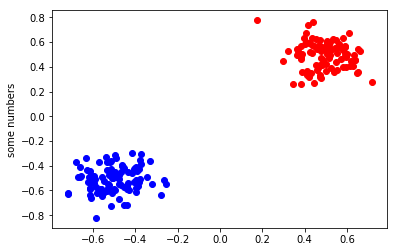

In [4]:
plt.plot(arr[:,0], arr[:,1],'ro', arr2[:,0], arr2[:,1],'bo')
plt.ylabel('some numbers')
plt.show()

In [5]:
def sigmoid(scores):
    return 1 / (1 + np.exp(-scores))

In [6]:
def log_likelihood(features, target, weights):
    scores = np.dot(features, weights)
    #ll = np.sum( target*scores - np.log(1 + np.exp(scores)) )
    
    ll = np.sum(target*np.log(sigmoid(scores)) + (1 - target)*np.log(1-sigmoid(scores)))
    return ll

<img src="gd.png">

In [7]:
def logistic_regression(features, target, num_steps, learning_rate, add_intercept = False):
    if add_intercept:
        intercept = np.ones((features.shape[0], 1))
        features = np.hstack((intercept, features))
        
    weights = np.zeros(features.shape[1])
    steps_arr = []
    loss = []
    times = []
    
    for step in range(num_steps):
        start = timeit.default_timer()
        scores = np.dot(features, weights)
        predictions = sigmoid(scores)
        

        # get updated weights with gradient
        output_error = target - predictions
        gradient = np.dot(features.T, output_error)
        weights += learning_rate * gradient
        
        #get useful info for plotting
        steps_arr.append(step)
        loss.append(-log_likelihood(features, target, weights))
        stop = timeit.default_timer()
        total = stop - start
        times.append(total) 
        
    return weights, steps_arr, loss, times

In [8]:
weights1, steps1, loss1, times1 = logistic_regression(train[:,:2],labels,
                     num_steps = 10000, learning_rate = 5e-5, add_intercept=True)

In [9]:
weights1

array([-0.01774473, -3.87570301, -3.87224035])

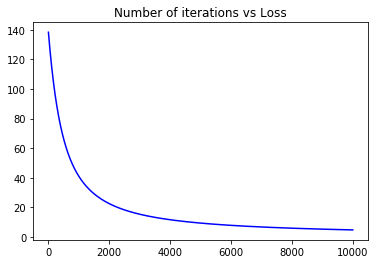

In [10]:
plt.plot(steps1, loss1, c='b')
plt.title("Number of iterations vs Loss")
plt.show()

In [11]:
def sgd(features, target, num_steps, learning_rate, add_intercept = False):
    if add_intercept:
        intercept = np.ones((features.shape[0], 1))
        features = np.hstack((intercept, features))
        
    weights = np.zeros(features.shape[1])
    steps_arr = []
    loss = []
    times = []
    print("entering forloop")
    
    for step in range(num_steps):
        start = timeit.default_timer()
        i = np.random.randint(features.shape[0])
        #print("i:",i)
        score = np.dot(features[i], weights)
        #print("score : ", score)
        predictions = sigmoid(score)
        #print("predictions: ", predictions)
        

        # get updated weights with gradient
        output_error = target[i] - predictions
        #print("output_error: ", output_error)
        gradient = np.dot(features[i].T, output_error)
        #print("gradient: ", gradient)
        weights += learning_rate * gradient
        
        #get useful info for plotting
        steps_arr.append(step)
        loss.append(-log_likelihood(features, target, weights))
        stop = timeit.default_timer()
        total = stop - start
        times.append(total) 
 
        
    return weights, steps_arr, loss, times

In [12]:
#print("calling stuffs")
weights2, steps2, loss2, times2 = sgd(train[:,:2],labels,
                     num_steps = 20000, learning_rate = 5e-3, add_intercept=True)

entering forloop


In [13]:
weights2

array([-0.01562654, -3.86915171, -3.88013579])

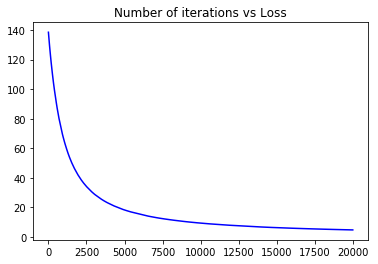

In [14]:
plt.plot(steps2, loss2, c='b')
plt.title("Number of iterations vs Loss")
plt.show()

In [15]:
average_gd = sum(times1)/len(times1)
print("average per iteration of gd: ", average_gd)
average_sgd = sum(times2)/len(times2)
print("average per iteration of sgd: ", average_sgd)

average per iteration of gd:  5.224729856854537e-05
average per iteration of sgd:  4.931345357326791e-05


In [34]:
print(average_gd > average_sgd)

True


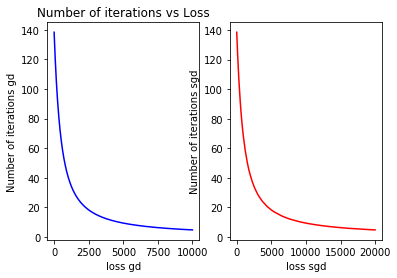

In [16]:
plt.subplot(1, 2, 1)
plt.plot(steps1, loss1, 'b')
plt.title('Number of iterations vs Loss')
plt.xlabel('loss gd')
plt.ylabel('Number of iterations gd')




plt.subplot(1, 2, 2)
plt.plot(steps2, loss2, 'r')
plt.xlabel('loss sgd')
plt.ylabel('Number of iterations sgd')


plt.show()

If we say that it begins to converge as the lines flatten out, then it is obvious that gd converges much faster than sgd. GD converges roughly around 8000 iterations, whereas sgd converges around 17000. I used a slightly bigger learning rate for sgd at 5e-3 for sgd vs 5e-5 for gd. Using the average times per iteration printed above, I also showed that sgd runs faster per iteration on average. Per iteration average for gd was 5.224729856854537e-05, and for sgd it was 4.931345357326791e-05. We can also see that the end weights for gd and sgd I printed out above are similar and therefore sgd is still as good.  

### 2.(15points) In class, we derived a closed form expression for solving linear regression problems. This is great for finding linear behavior in data; however, if the data is nonlinear, just as in the classification case, we have to resort to the kernel trick, i.e., replace all inner products in the data space with kernels. Here, we formalize this idea. Suppose we are given training data ${(x_{1}, y_{1}), (x_{2}, y_{2}), . . . (x_{n}, y_{n})$ where each response $y_{i}$ is a scalar, and each data point $x_{i}$ is a vector in d dimensions.  
<img src="least_squares_loss.png">

a. Assume that all data have been mapped into a higher dimensional space using the feature mapping x  → φ(x), write down an expression for the squared error function using a linear predictor w in the high-dimensional space.

$\bar{L} = (1/2) \sum_{i=1}^{n} (y_{i} - <\bar{w}, \phi(x_{i})>)^2$

b. Let Φ be the matrix with n rows, where row i consists of the feature mapping φ(xi). Write down a closed form expression for the optimal linear predictor w as a function of Φ and y.


if we assume X --> $\Phi$  
$\bar{w} = ({{\Phi}^T\Phi})^{-1}{\Phi}^Ty$

c. For a new query data point z, the predicted value is given by f (z) = ⟨w, φ(z)⟩. Plug in the closed form expression for w from the previous sub-problem to get an expression for f(z).

$f(z) = <w, \phi(z)>$  
$f(z) = <(({{\Phi}^T\Phi})^{-1}{\Phi}^Ty), \phi(z)>$  
$f(z) = (({{\Phi}^T\Phi})^{-1}{\Phi}^Ty)^T * \phi(z)$  
$f(z) = y^T{\Phi}(({{\Phi}^T\Phi})^{-1})^T * \phi(z)$  

d. Suppose you are given access to a kernel function K where K(x, x′) = ⟨φ(x), φ(x′)⟩. Mathematically show that all the calculations in (b) and (c) can be performed by invoking the kernel function alone without explicitly calculating φ ever. You may want to use the Sherman-Morrison-Woodbury identity for matrices:  <img src="2d.png">

from b we know that for a prediction at z, where $\bar{w} = ({{\Phi}^T\Phi})^{-1}{\Phi}^Ty$  
if we add new terms to fit the identity such that $A^{-1} = \lambda I_{d}$,  $C = \lambda I_{n}$ and $B = \sqrt(\lambda) \Phi$.     
 <img src="2d.jpg">

$f(z) = (({{\Phi}^T\Phi})^{-1}{\Phi}^Ty)^T * \phi(z)$   
which can be rewritten as the following using the Sherman-Morrison-Woodbury identity for matrices and our work for $\bar{w}$.  
$ = y^T({\Phi}{\Phi}^T)^{-1}{\Phi} * \phi(z)$   
$({\Phi}{\Phi}^T)$ is equal to an n x n matrix created by every row of ${\Phi}$ dot product with every row of ${\Phi}$.  
${\Phi} * \phi(z)$ is equal to an n x 1 matrix created by every row of ${\Phi}$ dot product with $\phi(z)$.  
We can then say that each entry in $({\Phi}{\Phi}^T)$ is equal to $<\phi(z), \phi(z')>$.  
We can then replace the dot product of $<z,z'>$ with a function k(z,z'), and so we can replace $({\Phi}{\Phi}^T)$ with K.   
We are then left with $y^T(K)^{-1}k(\Phi,\phi(z))$

#### a. Read the data and construct a table with 9 columns containing the numerical ratings. (Ignore the last 5 columns – they consist auxiliary information such as longitude/latitude, state, etc.)

In [17]:
#read in the data
df1 = pd.read_csv("places.txt", sep="\s+")
#get first 9 columns 
df = df1.ix[:, 0: 9]
df.head()

,Climate,HousingCost,HlthCare,Crime,Transp,Educ,Arts,Recreat,Econ
"Abilene,TX",521,6200,237,923,4031,2757,996,1405,7633
"Akron,OH",575,8138,1656,886,4883,2438,5564,2632,4350
"Albany,GA",468,7339,618,970,2531,2560,237,859,5250
"Albany-Schenectady-Troy,NY",476,7908,1431,610,6883,3399,4655,1617,5864
"Albuquerque,NM",659,8393,1853,1483,6558,3026,4496,2612,5727


#### b. Replace each value in the matrix by its base-10 logarithm. (This pre-processing is done for convenience since the numerical range of the ratings is large.) You should now have a data matrix X whose rows are 9-dimensional vectors representing the different cities.

In [18]:
dflog = np.log10(df)
dflog = dflog.replace([np.inf, -np.inf], np.nan)
#df['0'] = df1.ix[:,0]
dflog = dflog.fillna(0)
dflog.head()

,Climate,HousingCost,HlthCare,Crime,Transp,Educ,Arts,Recreat,Econ
"Abilene,TX",2.716838,3.792392,2.374748,2.965202,3.605413,3.440437,2.998259,3.147676,3.882695
"Akron,OH",2.759668,3.910518,3.219060,2.947434,3.688687,3.387034,3.745387,3.420286,3.638489
"Albany,GA",2.670246,3.865637,2.790988,2.986772,3.403292,3.408240,2.374748,2.933993,3.720159
"Albany-Schenectady-Troy,NY",2.677607,3.898067,3.155640,2.785330,3.837778,3.531351,3.667920,3.208710,3.768194
"Albuquerque,NM",2.818885,3.923917,3.267875,3.171141,3.816771,3.480869,3.652826,3.416973,3.757927


#### c. Perform PCA on the data. Remember to center the data points first by computing the mean data vector μ and subtracting it from every point. With the centered data matrix, do an SVD and compute the principal components.

In [19]:
df_scaled = dflog.subtract(dflog.mean())

In [20]:
df_scaled[:3]

,Climate,HousingCost,HlthCare,Crime,Transp,Educ,Arts,Recreat,Econ
"Abilene,TX",-0.001656,-0.115099,-0.580738,0.013575,0.008211,-0.006170,-0.207950,-0.078891,0.148513
"Akron,OH",0.041174,0.003027,0.263574,-0.004193,0.091485,-0.059573,0.539178,0.193719,-0.095693
"Albany,GA",-0.048248,-0.041854,-0.164498,0.035145,-0.193910,-0.038367,-0.831461,-0.292574,-0.014023


In [21]:
#use sklearn PCA to compare numpy implementation of svd
from sklearn.decomposition import PCA
model = PCA(n_components=1, copy=True, random_state=0)
model.fit(df_scaled)

singular_values = model.singular_values_
Sigma = np.diag(singular_values)

In [22]:
# get the svd
u, s, w = np.linalg.svd(df_scaled)
#view the svd
w

array([[ 0.03507288,  0.09335159,  0.40776448,  0.10044536,  0.15009714,
         0.03215319,  0.87434057,  0.15899622,  0.01949418],
       [ 0.0088782 ,  0.00923057, -0.85853187,  0.22042372,  0.05920111,
        -0.06058858,  0.30380632,  0.33399255,  0.0561011 ],
       [-0.14087477, -0.12884967, -0.27605769, -0.5926882 , -0.22089816,
        -0.0081447 ,  0.36328732, -0.58362605, -0.12085337],
       [ 0.15274476, -0.17838233, -0.03516139,  0.72366303, -0.12620531,
        -0.00519693,  0.08111571, -0.62822609,  0.05216997],
       [-0.39751159, -0.1753133 , -0.05032469,  0.01345714,  0.86996951,
         0.04779772, -0.05506994, -0.21328989, -0.02965242],
       [ 0.83129501,  0.20905725, -0.08967085, -0.16401885,  0.37244964,
         0.02362804, -0.02812147, -0.14179906, -0.26481279],
       [-0.0559096 ,  0.6958923 , -0.06245284, -0.05553037,  0.0724604 ,
         0.05738567, -0.0232698 , -0.23451524,  0.66448592],
       [-0.31490125,  0.61361583, -0.0210358 ,  0.1823479 , -0

#### d. Write down the first two principal components v1 and v2. Provide a qualitative interpreta- tion of the components. Which among the nine factors do they appear to correlate the most with?

In [23]:
#print first two principal components
v1 = w.T[:,0]
print(v1)
v2 = w.T[:,1]
print(v2)

[ 0.03507288  0.09335159  0.40776448  0.10044536  0.15009714  0.03215319
  0.87434057  0.15899622  0.01949418]
[ 0.0088782   0.00923057 -0.85853187  0.22042372  0.05920111 -0.06058858
  0.30380632  0.33399255  0.0561011 ]


First we know that the values in the vectors with the highest absolute value contribute the most to explaining the variation in the data as they have the highest absolute values relative to the rest of the data features.   

If we start indexing with 1, then in the first principal component the 3rd and 7th have the highest absolute values over 0.4. These correspond to health care and the arts.   
For the second principal component we can see that the 3rd, 7th, and 8th columns have the highest absolute values. These correspond to health care, arts, and recreation. Overall, it seems health care and arts contribute a lot to explaining variation in the data in both principal components.  

#### e. Project the data points onto the first two principal components. (That is, compute the highest 2 scores of each of the data points.) Plot the scores as a 2D scatter plot. Which cities correspond to outliers in this scatter plot?

In [24]:
w2 =w.T[:,:2]
x2d = df_scaled.dot(w2)

In [25]:
cities = list(df.index)
df_temp = pd.DataFrame(x2d)
df_temp['cities'] = cities
df_temp.head()

,0,1,cities
"Abilene,TX",-0.436677,0.420163,"Abilene,TX"
"Akron,OH",0.620958,0.005346,"Akron,OH"
"Albany,GA",-0.873256,-0.212104,"Albany,GA"
"Albany-Schenectady-Troy,NY",0.502948,-0.063621,"Albany-Schenectady-Troy,NY"
"Albuquerque,NM",0.609775,-0.007233,"Albuquerque,NM"


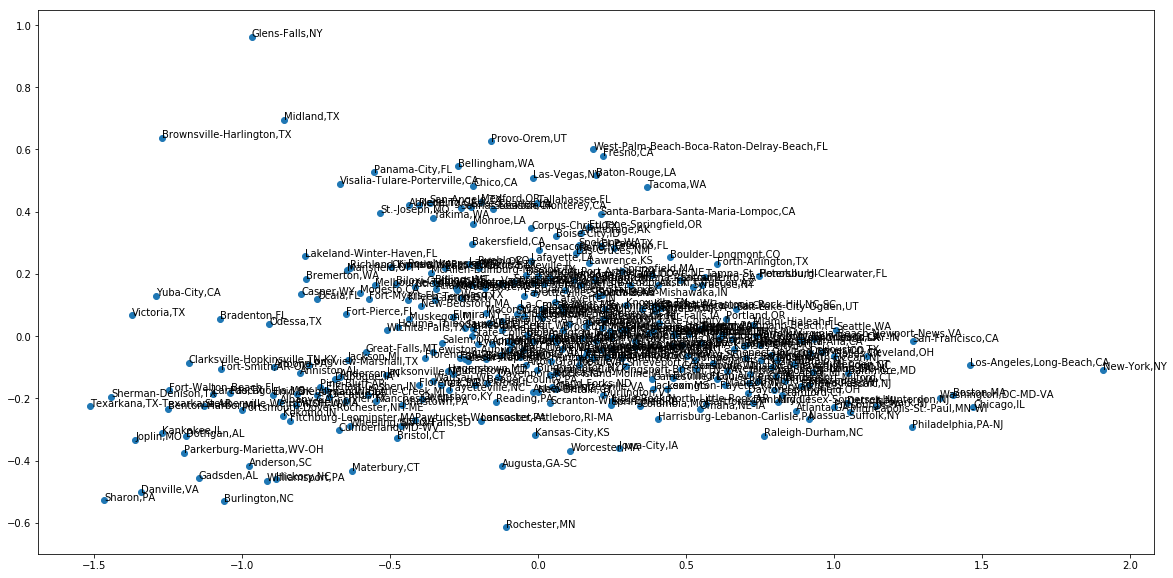

In [26]:
fig, ax = plt.subplots(figsize=(20,10))
z = df_temp.loc[:,0]
y = df_temp.loc[:,1]
ax.scatter(z, y)

for i, txt in enumerate(cities):
    ax.annotate(txt, (z[i],y[i]))

The cities that seem to be outliers on pc1 axis are New York; LA; Sharon, PA; Texarkana,TX; and Brownsville-Harlington, TX. On pc2 axis they include Glens-Falls, NY; MidLand,Tx; Brownsville-Harlington,TX; Rochester, MN.  

This means that LA and NY probably have better health care and an arts scence than the Texas and Pennsylvaian city outliers. This aligns with many conceptions about health care and arts/entertainment environment on large coastal cities vs rural and 'redneck' cities.  

On the pc2 axis, Glens-Falls, NY; MidLand,Tx; Brownsville-Harlington,TX have relatively high health care, arts, and recreation opportunities vs cities like Rochester, MN or August, GA-SC. This was strange given Rochester,MN is home to the MAYO clinic which is one of the best hospitals in the country.   

#### f. Repeat Steps 2-5, but with a slightly different data matrix – instead of computing the base-10 logarithm, use the normalized z-score of each data point. (Recall that you used z-scores in Problem Set 2.) How do your answers change?

In [27]:
cols = df.columns

for col in cols:
    col_zscore = col + '_zscore'
    df[col_zscore] = (df[col] - df[col].mean())/df[col].std(ddof=0)

In [28]:
df.head()

,Climate,HousingCost,HlthCare,Crime,Transp,Educ,Arts,Recreat,Econ,Climate_zscore,HousingCost_zscore,HlthCare_zscore,Crime_zscore,Transp_zscore,Educ_zscore,Arts_zscore,Recreat_zscore,Econ_zscore
"Abilene,TX",521,6200,237,923,4031,2757,996,1405,7633,-0.147006,-0.901297,-0.947340,-0.106712,-0.123592,-0.180726,-0.464893,-0.546646,1.946433
"Akron,OH",575,8138,1656,886,4883,2438,5564,2632,4350,0.300664,-0.087570,0.469568,-0.210467,0.464411,-1.176652,0.520604,0.974442,-1.085467
"Albany,GA",468,7339,618,970,2531,2560,237,859,5250,-0.586386,-0.423054,-0.566902,0.025084,-1.158809,-0.795765,-0.628640,-1.223512,-0.254304
"Albany-Schenectady-Troy,NY",476,7908,1431,610,6883,3399,4655,1617,5864,-0.520064,-0.184142,0.244900,-0.984419,1.844699,1.823613,0.324497,-0.283834,0.312735
"Albuquerque,NM",659,8393,1853,1483,6558,3026,4496,2612,5727,0.997040,0.019500,0.666278,1.463626,1.620402,0.659098,0.290194,0.949648,0.186213


In [29]:
df_new = df[['Climate_zscore','HousingCost_zscore','HlthCare_zscore', 'Crime_zscore','Transp_zscore','Educ_zscore','Arts_zscore','Recreat_zscore','Econ_zscore']]

In [30]:
#scale the data
df_scaled2 = df_new.subtract(df_new.mean())

# get the svd
u, s, w_two = np.linalg.svd(df_scaled2)

#print first two principal components
v1 = w_two.T[:,0]
print(v1)
v2 = w_two.T[:,1]
print(v2)

[ 0.20641395  0.35652161  0.46021465  0.28129838  0.35115078  0.27529264
  0.46305449  0.32788791  0.13541225]
[ 0.21783531  0.250624   -0.29946528  0.35534227 -0.17960448 -0.48338209
 -0.19478992  0.38447464  0.47128328]


In the first principal component, the 3rd and 7th columns have the highest values. These correspond to health care and arts.  The 2nd, 5th, and 8th columns are the second highest absolute values cluster around .33. These correspond to housing cost, transportation and recreation. Even though the numbers are slightly different, overall the same features seem to contribute to explaining a lot of the variation as they did when we took the base-10 log first.  

In the second principal component, the 6th, and 9th columns have the highest absolute values and correspond to education and economics.  The 4th and 8th entries' absolute values explain the next most variation. These correspond to crime and recreation. This is different to the breakdown of the second principal component when we scaled using the base 10 log. In that instance, the 3rd, 7th, and 8th contributed more to explaining the variation. 

In [31]:
w2 = w_two.T[:,:2]
x2d = df_scaled.dot(w2)
df_temp2 = pd.DataFrame(x2d)
df_temp2['cities'] = cities
df_temp2.head()

,0,1,cities
"Abilene,TX",-0.405687,0.231201,"Abilene,TX"
"Akron,OH",0.445652,-0.133973,"Akron,OH"
"Albany,GA",-0.652195,0.136987,"Albany,GA"
"Albany-Schenectady-Troy,NY",0.353890,-0.295246,"Albany-Schenectady-Troy,NY"
"Albuquerque,NM",0.591083,-0.048159,"Albuquerque,NM"


In [32]:
type(df_temp2)

pandas.core.frame.DataFrame

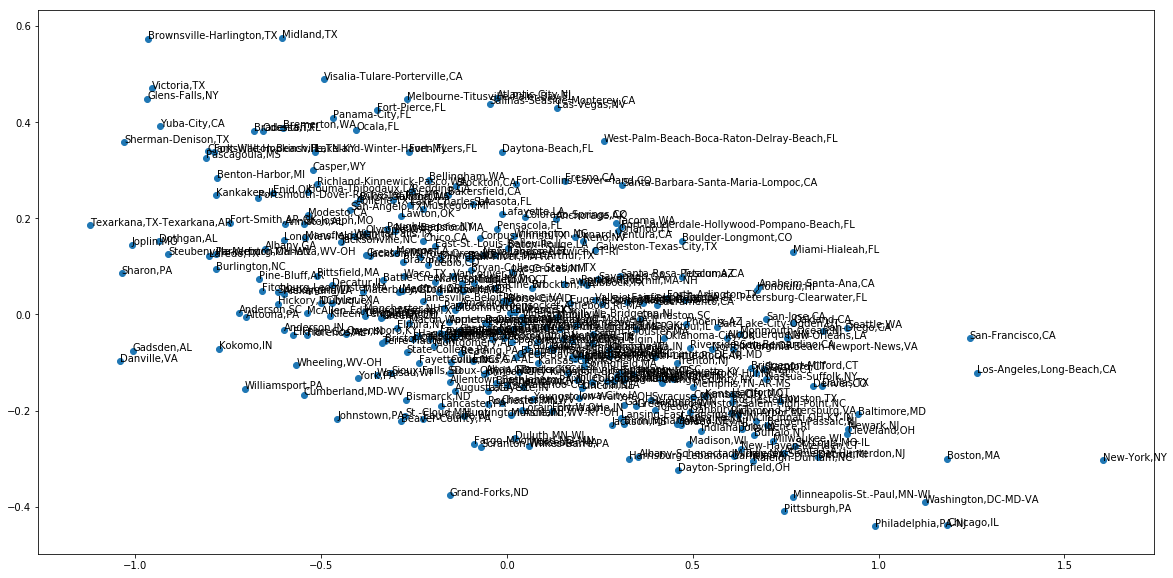

In [33]:
fig, ax = plt.subplots(figsize=(20,10))
z = df_temp2.loc[:,0]
y = df_temp2.loc[:,1]
ax.scatter(z, y)

for i, txt in enumerate(cities):
    ax.annotate(txt, (z[i],y[i]))

The cities that seem to be outliers on pc1 axis are San Francisco; New York; LA; Chicago, IL; Washington,DC-MD-VA; Brownsville-Harlington.TX; Texarkana, TX; and Danville, VA. On pc2 axis they include MidLand,Tx; Brownsville-Harlington,TX; Grand-Forks, ND; Philadelphia,PA; Chicago, IL.  

This means that for pc1 LA and NY probably have better health care and an arts scence than Brownsville-Harlington, TX; Texarkana, TX; Sharon, PA; cities on the negative side. This aligns with many conceptions about health care and arts/entertainment environment on large coastal cities vs rural and 'redneck' cities.  

The cities that are on the positive axis side of pc2 like Brownsville-Harlington, TX; Midland, TX; Victoria, TX have relatively better economics and education than cities like Grand-Forks, ND; Philadelphia, PA; and Chicago, IL. I would say this may be because there is more poverty in a rural area like Grand-Forks and in the inner city of Chicago and Philadelphia.  

Using the z-scores seemed to spread the data a bit nicer so it was more easy to interpret the outliers when graphed. The principal components and correlated features were similar for pc1 but had some differences with pc2.  